In [19]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

from post_to_new_libs_and_pairs import collect_post_count_to_new_libs_and_pairs

In [20]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

## Heaps's Law

DOING LIMIT:  10
Processing python
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:04<00:00, 293944.16it/s]


	...done.
	Libs Fit performed; slope=0.7622394702148918, intercept=1.3027904049689454, r2=0.9986053980047148
Processing r
	 Opening resources...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:01<00:00, 262785.40it/s]


	...done.
	Libs Fit performed; slope=0.9811385522189838, intercept=-1.488171766602287, r2=0.9986268924771542
Processing javascript
	 Opening resources...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 307167.68it/s]


	...done.
	Libs Fit performed; slope=0.9364994160632709, intercept=-0.43755134644187343, r2=0.9793473256358243
Processing java
	 Opening resources...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:01<00:00, 219820.74it/s]


	...done.
	Libs Fit performed; slope=0.6665361363392618, intercept=-0.4060496864410119, r2=0.9944963239277212
Processing cpp
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 708946.40it/s]


	...done.
	Libs Fit performed; slope=0.9105246806651857, intercept=-0.7055313031419015, r2=0.9929641719064379
Processing php
	 Opening resources...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 296559.60it/s]


	...done.
	Libs Fit performed; slope=0.7994825332470916, intercept=-0.3418872809930571, r2=0.9982357064525552
Processing ruby
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 712561.77it/s]


	...done.
	Libs Fit performed; slope=0.8777920083417668, intercept=-0.45247320270203506, r2=0.9954160140451632
Processing perl
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 620372.07it/s]


	...done.
	Libs Fit performed; slope=0.6963565056662622, intercept=1.475912726605606, r2=0.9925763031872523
Processing rust
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 658599.50it/s]


	...done.
	Libs Fit performed; slope=1.037429361185645, intercept=-0.8769288328454188, r2=0.9978559490765788
Processing swift
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 227981.64it/s]


	...done.
	Libs Fit performed; slope=0.8806652134884809, intercept=-1.3009676745480334, r2=0.9934447763016916
Processing objectivec
	 Opening resources...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 120132.46it/s]


	...done.
	Libs Fit performed; slope=0.9432820841904642, intercept=-1.509588717536551, r2=0.9940308895603519
Processing c#
	 Opening resources...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 328625.52it/s]


	...done.
	Libs Fit performed; slope=1.0160394168822495, intercept=-3.944737144494451, r2=0.9941083916662855


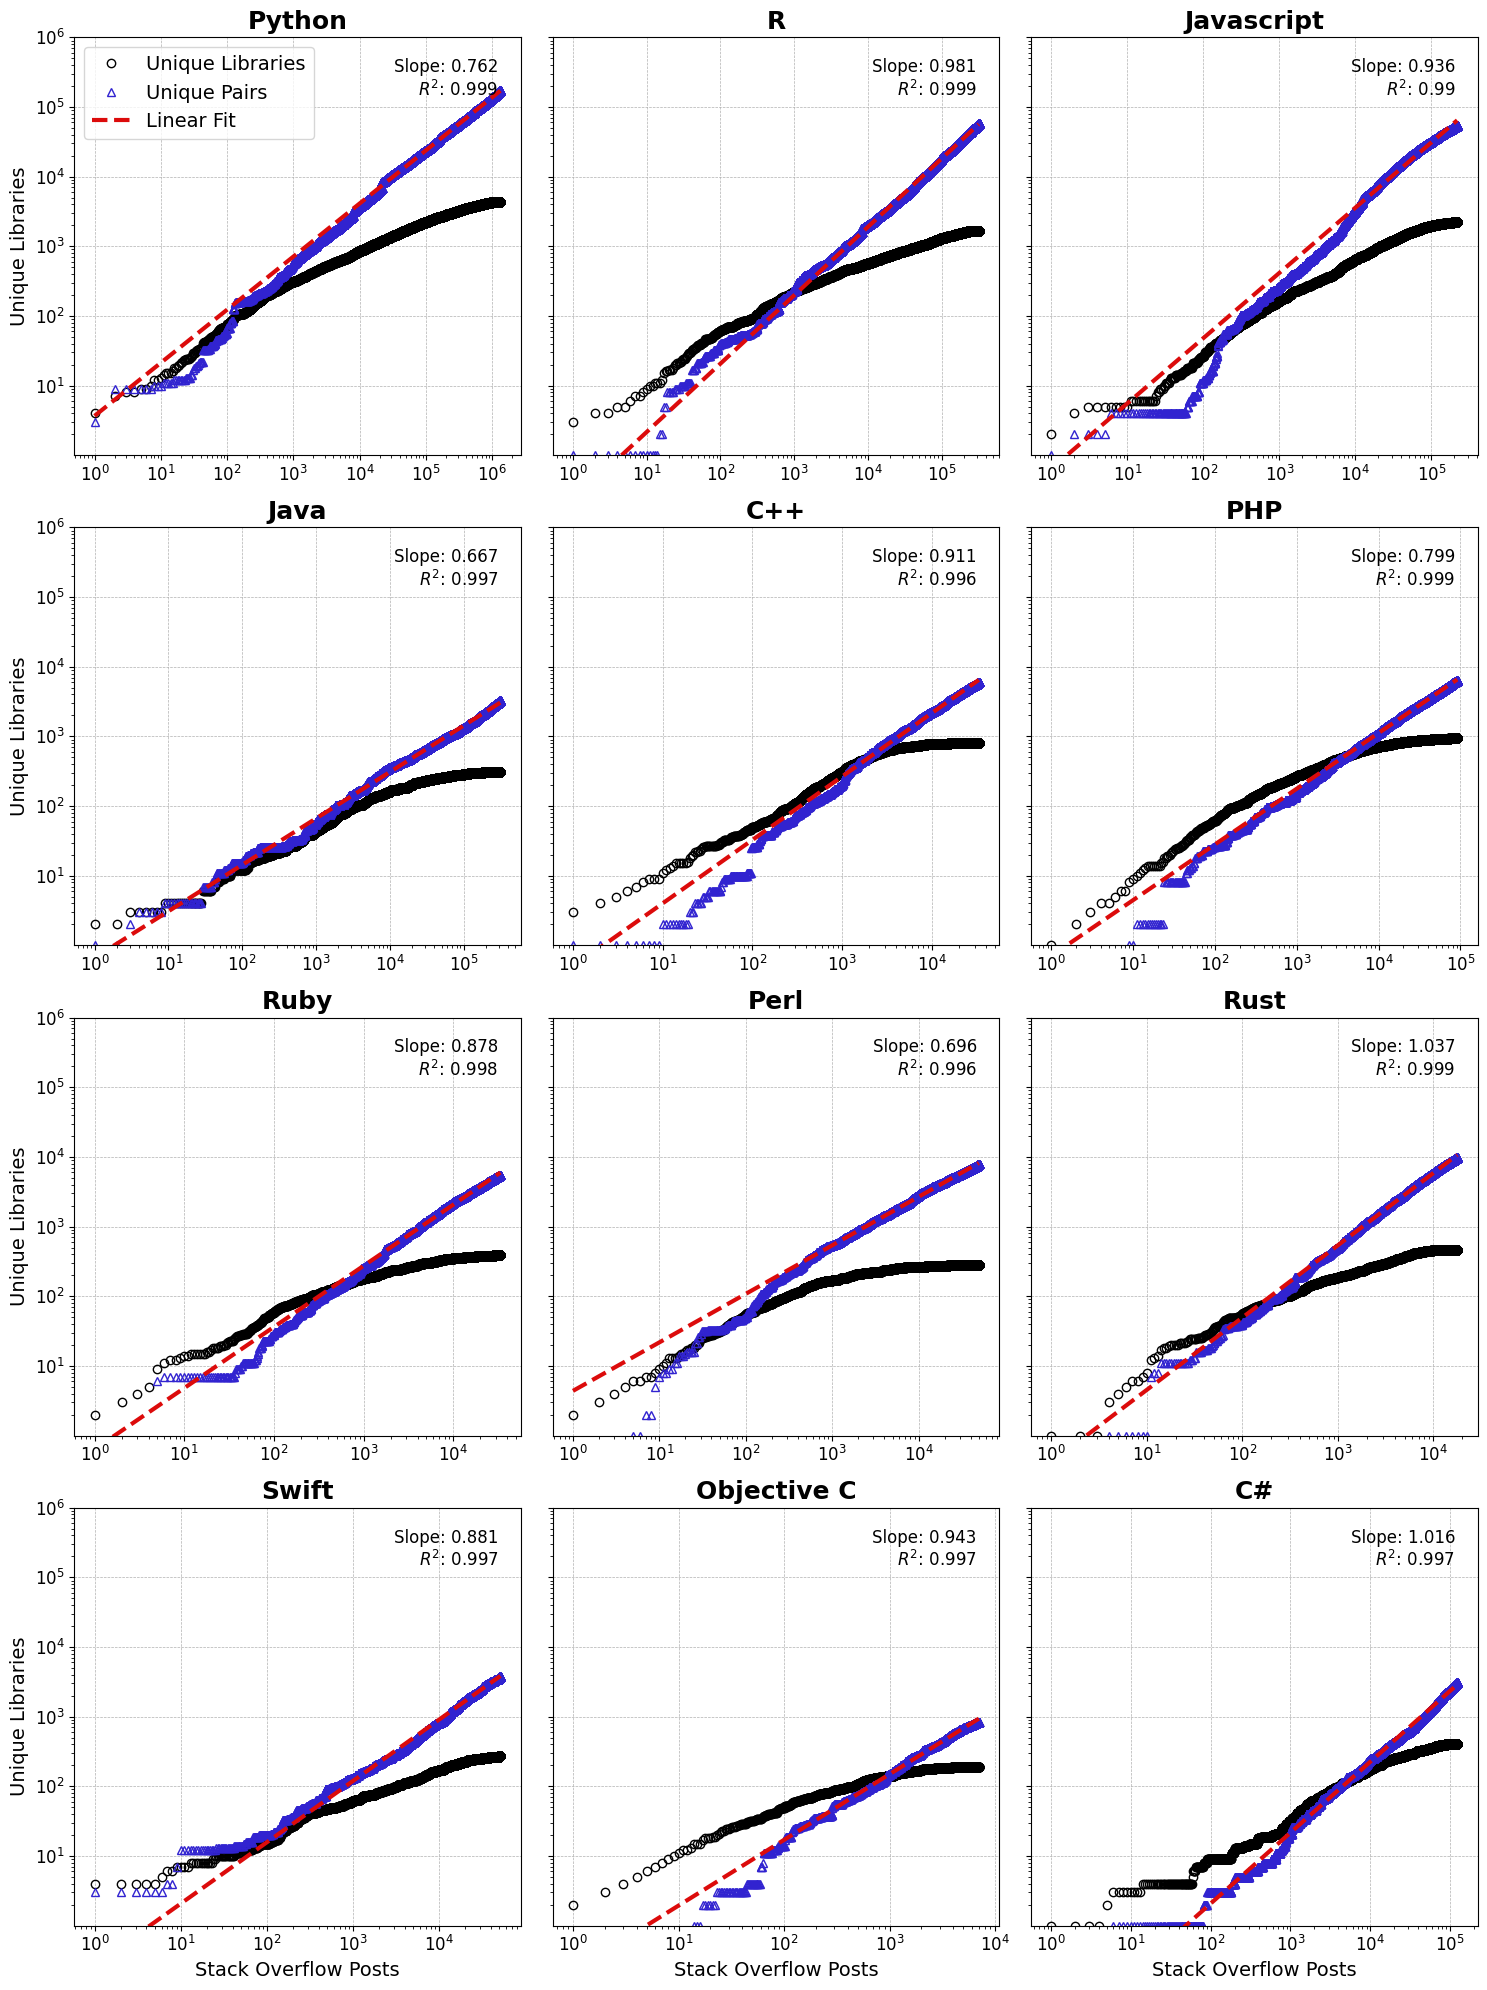

In [16]:

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter, LogFormatterExponent,LogFormatterMathtext,  LogLocator
from scipy import stats


import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

chrysler_blue = "#3123D0"
mellow_blue = "#448AEB"
ripe_red = "#DC0B0B"



for APPEARANCE_LOWER_LIMIT in [10]:#[0, 10, 50, 100]:
    print("DOING LIMIT: ", APPEARANCE_LOWER_LIMIT)

    lib_alphas = {}
    lib_r2 = {}
    pair_alphas = {}
    pair_r2 = {}

    slopes = {}
    lin_r2s = {}
    
    square_size = 5
    rows, columns = (len(LANGUAGES) + 2) // 3, 3
    fig = plt.figure(figsize=(square_size * columns, square_size * rows))
    gs = GridSpec(rows, columns, figure=fig)
    plt.subplots_adjust(hspace=0.8, wspace=0.3)
    
    for index, language in enumerate(LANGUAGES):
        print(f"Processing {language}")
        path_to_lib = f"data/results/{language}"
    
        i, j = index // columns, index % columns
        ax = fig.add_subplot(gs[i, j])
        
        print("\t Opening resources...")
        post_to_libs, _ = collect_post_count_to_new_libs_and_pairs(language, count_lower_limit=APPEARANCE_LOWER_LIMIT)
        
        with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
            all_libs_dates = json.load(handle)
            
        with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
            all_pairs_dates = json.load(handle)
        print("\t...done.")
        
        t0 = time.time()
        xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
        ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
        xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
        ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
        t1 = time.time()
    

        pairs_count = [d[1] for d in post_to_libs['distinct_pairs_plot']]
        xs = np.array(range(1, len(pairs_count) + 1))
       
       # Log-transform the data
        log_xs = np.log(xs)  # log-transform x-values
        log_pairs_count = np.log([1+ item for item in ys_pairs])  # log-transform y-values
        
        # Perform linear regression on log-log transformed data
        slope, intercept, r_value, _, _ = stats.linregress(log_xs, log_pairs_count)
        print(f"\tLibs Fit performed; slope={slope}, intercept={intercept}, r2={r_value**2}")
        
        # Plotting in log-log space
        xs_range = np.array(xs)
        
    
        xs = list(range(len(xs_libs)))
        
        ax.loglog(xs, [ys_libs[i] for i in xs], "o", color="black", markerfacecolor='none', label="Unique Libraries")
        ax.loglog(xs, [ys_pairs[i] for i in xs], "^", color=chrysler_blue, markerfacecolor='none', label="Unique Pairs")

        fitted_line = np.exp(intercept) * xs_range ** slope  # Convert the fit back to original scale
        ax.loglog(xs_range, fitted_line, "--", color=ripe_red, label="Linear Fit", linewidth=3)
       
        # Set y-axis limits and ticks to range from 1 to 1 million with logarithmic ticks
        ax.set_ylim(1, 1_000_000)
        ax.set_yscale('log')
        ax.set_yticks([10, 100, 1000, 10000, 100000, 1000000])

        
        ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
        ax.grid(True, which="major", linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)

        if index % columns == 0:
            ax.set_ylabel('Unique Libraries', fontsize=14)  # Set y-axis label for the first column
            if i == 0:
                ax.legend(fontsize=14, loc="upper left")
        else:
            ax.set_yticklabels([])  # Hide y-axis tick labels for other columns
        
        ax.set_xscale('log')
        if i == rows - 1:
            ax.set_xlabel('Stack Overflow Posts', fontsize=14)  # Add an appropriate X-axis label
        ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))


        ax.text(0.95, 0.95, f'Slope: {round(slope, 3)}\n$R^2$: {round(r_value, 3)}', 
        transform=ax.transAxes, 
        fontsize=12, 
        verticalalignment='top',  # Align text to the top
        horizontalalignment='right')  # Align text to the right

        slopes[language] = round(slope, 3)
        lin_r2s[language] = round(r_value, 3)
    
    plt.tight_layout()
    
    plt.savefig(f"heaps_12_pairs_with_limit_{APPEARANCE_LOWER_LIMIT}.png")
#plt.show()

In [5]:
import pandas as pd

In [18]:
df = pd.DataFrame({
    'Language': slopes.keys(),
    'Slope': slopes.values(),
    r'$R^2$': lin_r2s.values()
})
df

,Language,Slope,$R^2$
0,python,0.762,0.999
1,r,0.981,0.999
2,javascript,0.936,0.990
3,java,0.667,0.997
4,cpp,0.911,0.996
5,php,0.799,0.999
6,ruby,0.878,0.998
7,perl,0.696,0.996
8,rust,1.037,0.999
9,swift,0.881,0.997


## Zip's Law

In [7]:
import powerlaw


data = np.random.randint(1, 100, 1000)  # Replace with actual data

# Fit the Yule-Simon distribution using powerlaw
fit = powerlaw.Fit(data, discrete=True, distribution='yule')

# Retrieve the estimated rho
rho = fit.power_law.alpha - 1  # Adjust as per power law notation
print(f"Estimated rho: {rho}")

Calculating best minimal value for power law fit
Estimated rho: 7.09494114085172


Processing python


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:05<00:00, 253201.49it/s]


R^2: 0.9965
Processing r


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 410350.04it/s]


R^2: 0.9930
Processing javascript


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 353774.79it/s]


R^2: 0.9990
Processing java


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 400457.52it/s]


R^2: 0.9972
Processing cpp


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 260604.42it/s]


R^2: 0.9975
Processing php


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 334555.28it/s]


R^2: 0.9984
Processing ruby


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 747845.95it/s]


R^2: 0.9971
Processing perl


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 670037.17it/s]


R^2: 0.9968
Processing rust


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 693351.06it/s]


R^2: 0.9986
Processing swift


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 241981.02it/s]


R^2: 0.9955
Processing objectivec


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 789749.49it/s]


R^2: 0.9921
Processing c#


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 314562.52it/s]


R^2: 0.9981
Processing python


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:04<00:00, 312717.21it/s]


R^2: 0.9965
Processing r


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 380773.41it/s]


R^2: 0.9930
Processing javascript


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 345866.91it/s]


R^2: 0.9990
Processing java


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 386349.99it/s]


R^2: 0.9972
Processing cpp


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 836500.53it/s]


R^2: 0.9975
Processing php


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 301055.32it/s]


R^2: 0.9984
Processing ruby


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 791428.04it/s]


R^2: 0.9971
Processing perl


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 671734.66it/s]


R^2: 0.9968
Processing rust


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 721951.93it/s]


R^2: 0.9986
Processing swift


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 201445.01it/s]


R^2: 0.9955
Processing objectivec


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 897537.89it/s]


R^2: 0.9921
Processing c#


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 793186.54it/s]


R^2: 0.9981
Processing python


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:04<00:00, 296727.55it/s]


R^2: 0.9965
Processing r


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 359618.67it/s]


R^2: 0.9930
Processing javascript


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 674989.51it/s]


R^2: 0.9990
Processing java


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 354839.24it/s]


R^2: 0.9972
Processing cpp


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 835862.18it/s]


R^2: 0.9975
Processing php


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 836284.53it/s]


R^2: 0.9984
Processing ruby


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 717546.96it/s]


R^2: 0.9971
Processing perl


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 562927.97it/s]


R^2: 0.9968
Processing rust


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 745590.31it/s]


R^2: 0.9986
Processing swift


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 732225.24it/s]


R^2: 0.9955
Processing objectivec


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 929811.83it/s]


R^2: 0.9921
Processing c#


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 263568.68it/s]


R^2: 0.9981
Processing python


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:03<00:00, 394658.46it/s]


R^2: 0.9965
Processing r


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 689651.46it/s]


R^2: 0.9930
Processing javascript


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 675165.96it/s]


R^2: 0.9990
Processing java


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 721402.78it/s]


R^2: 0.9972
Processing cpp


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 791985.10it/s]


R^2: 0.9975
Processing php


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 804785.77it/s]


R^2: 0.9984
Processing ruby


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 721438.05it/s]


R^2: 0.9971
Processing perl


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 641769.23it/s]


R^2: 0.9968
Processing rust


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 709134.30it/s]


R^2: 0.9986
Processing swift


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 711200.96it/s]


R^2: 0.9955
Processing objectivec


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 875392.26it/s]


R^2: 0.9921
Processing c#


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 796535.62it/s]


R^2: 0.9981


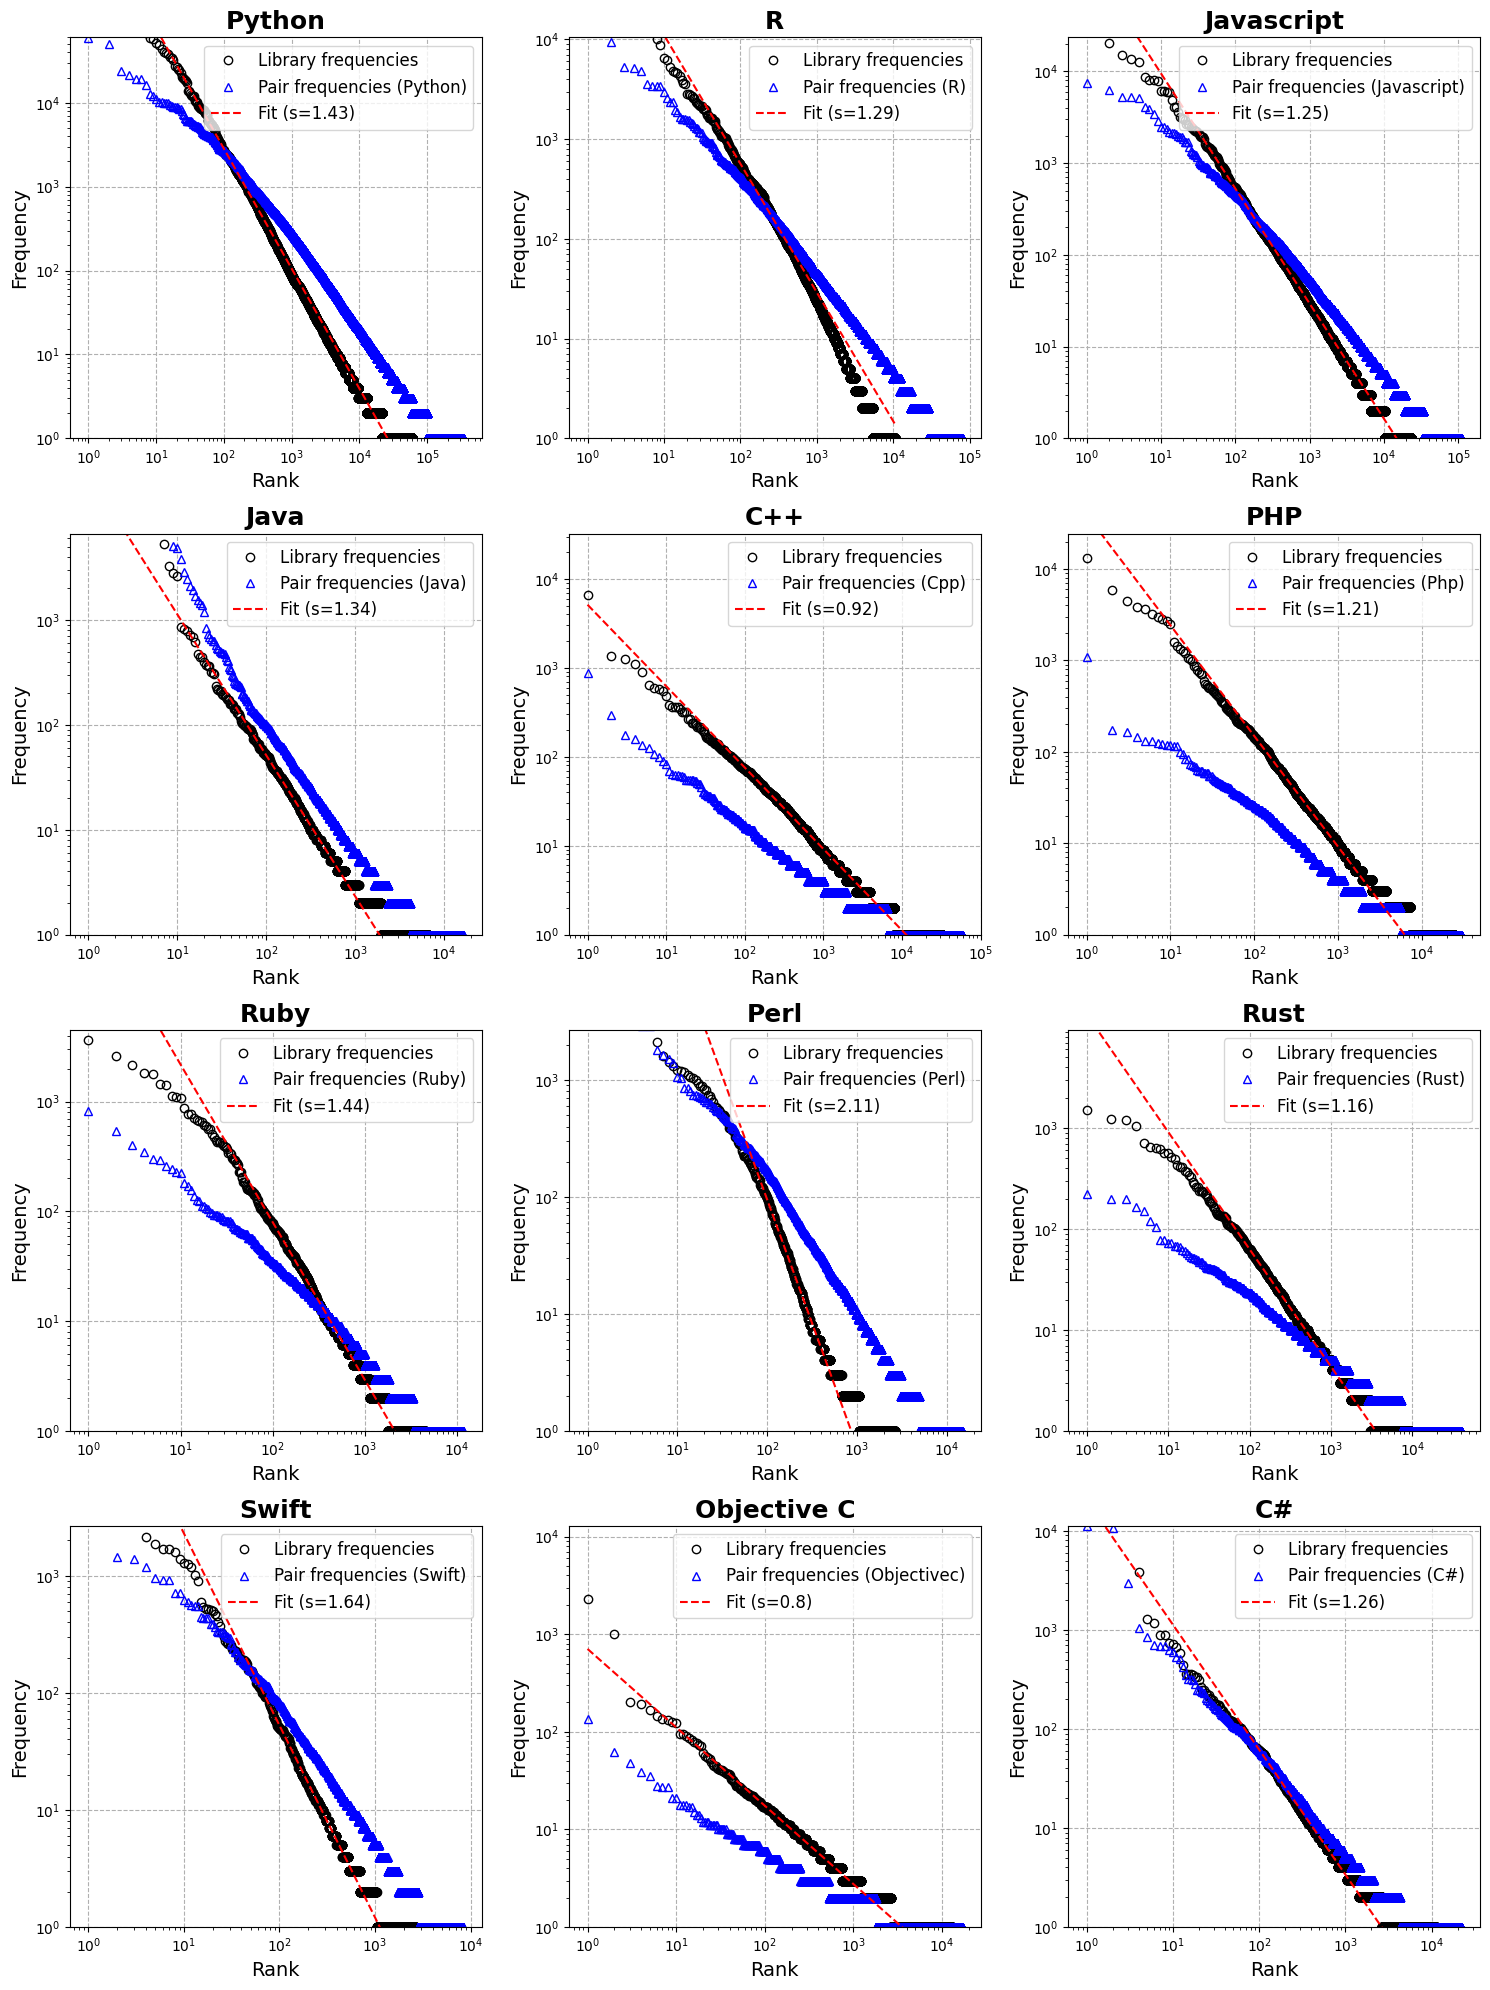

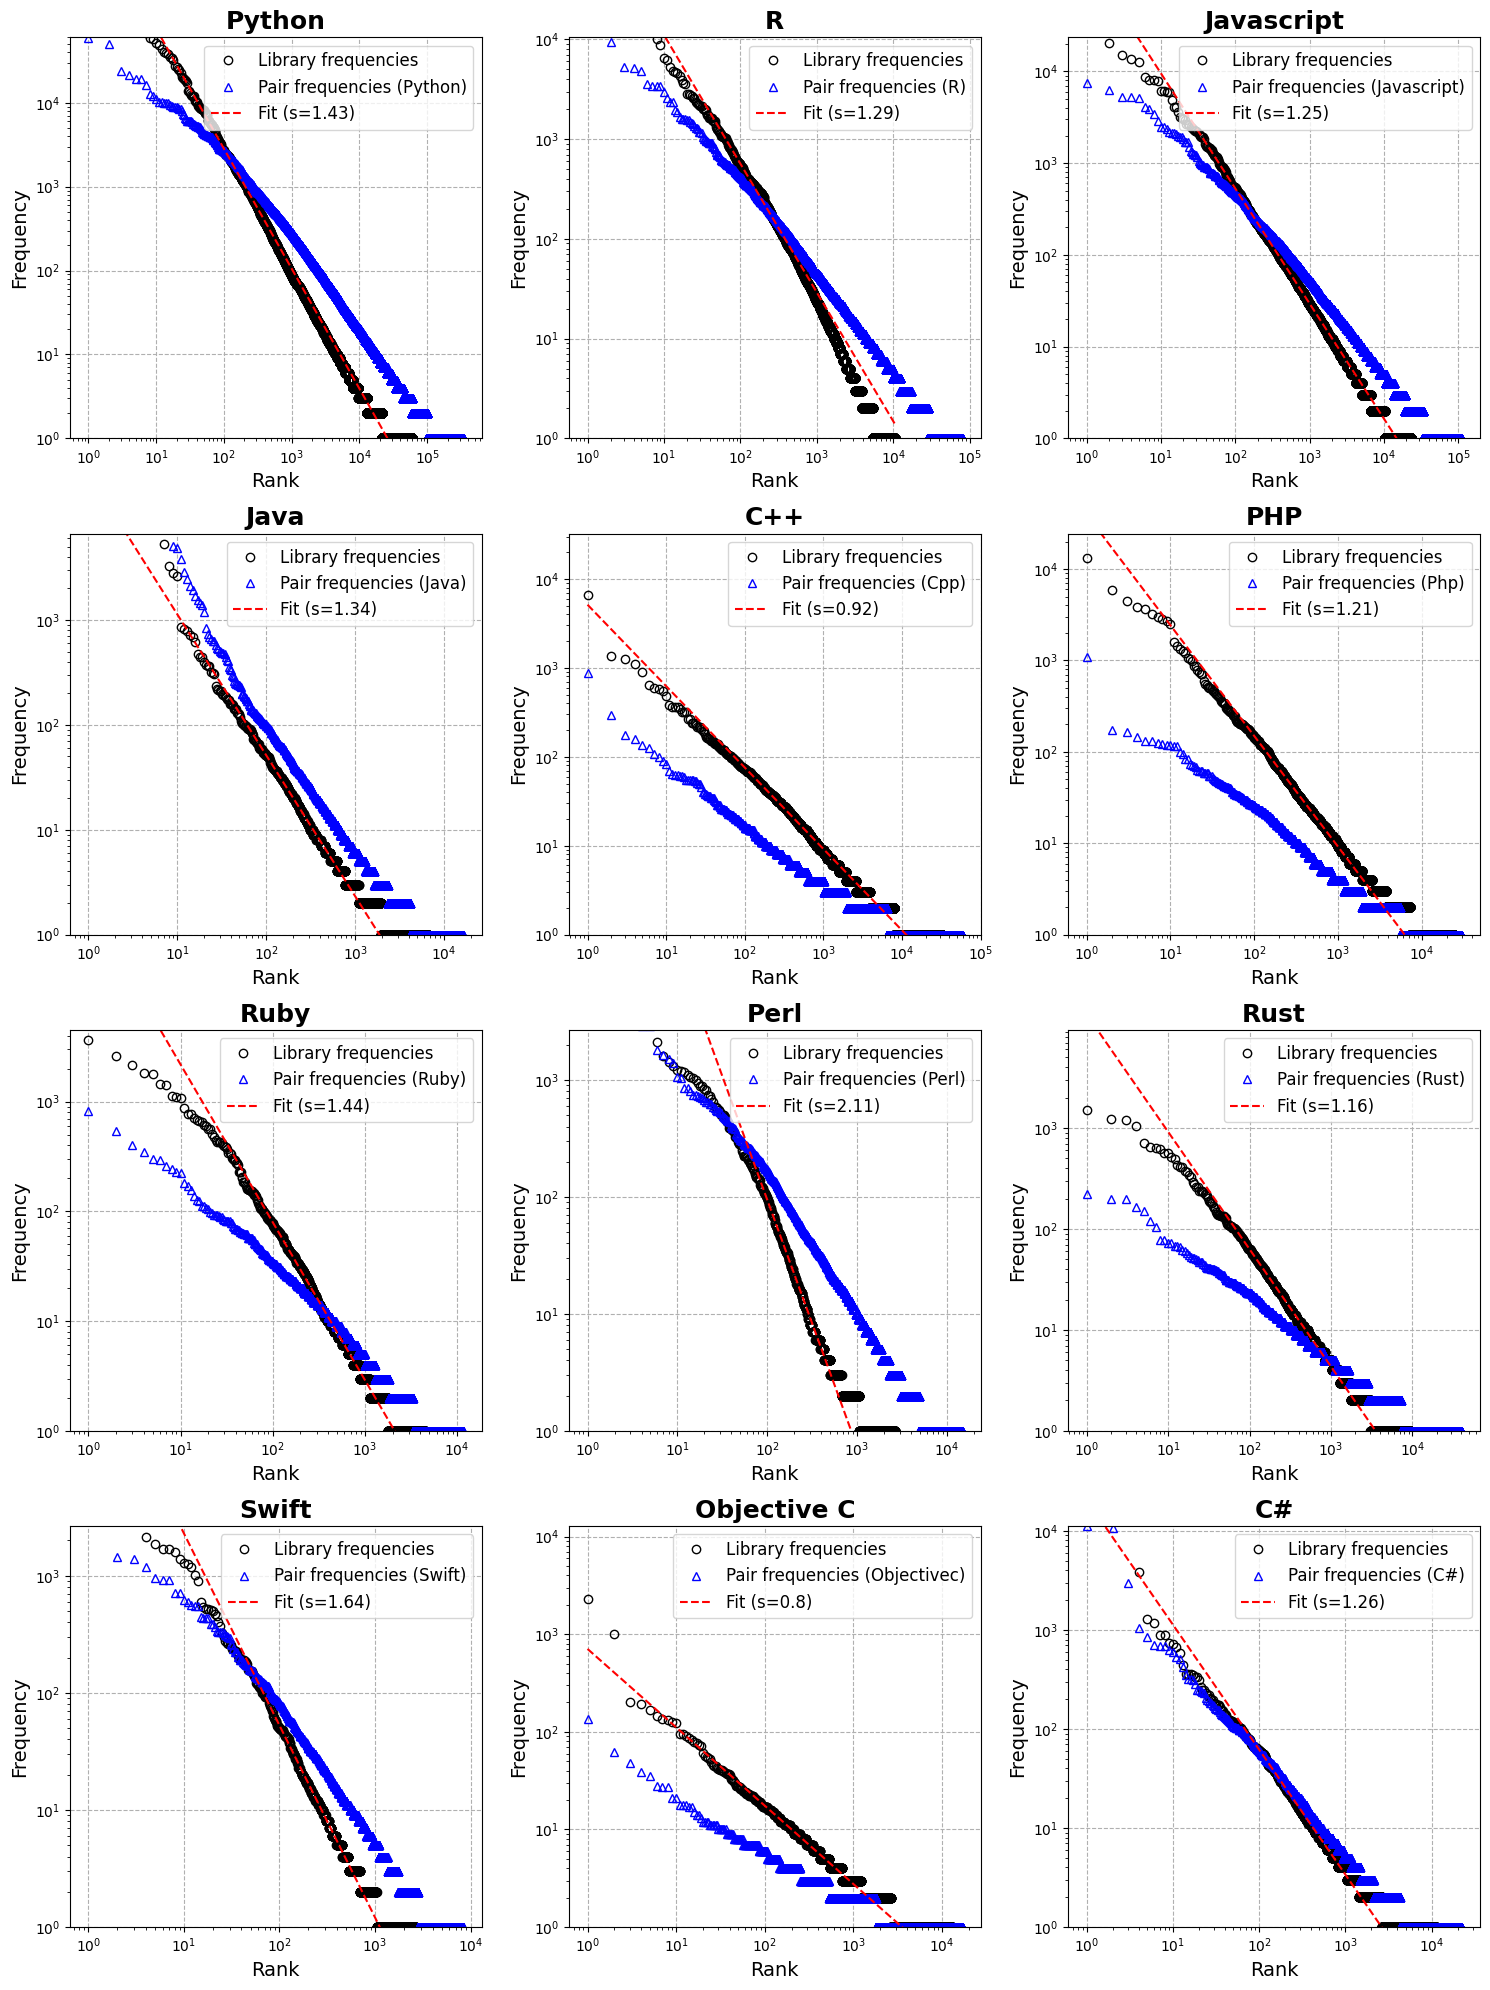

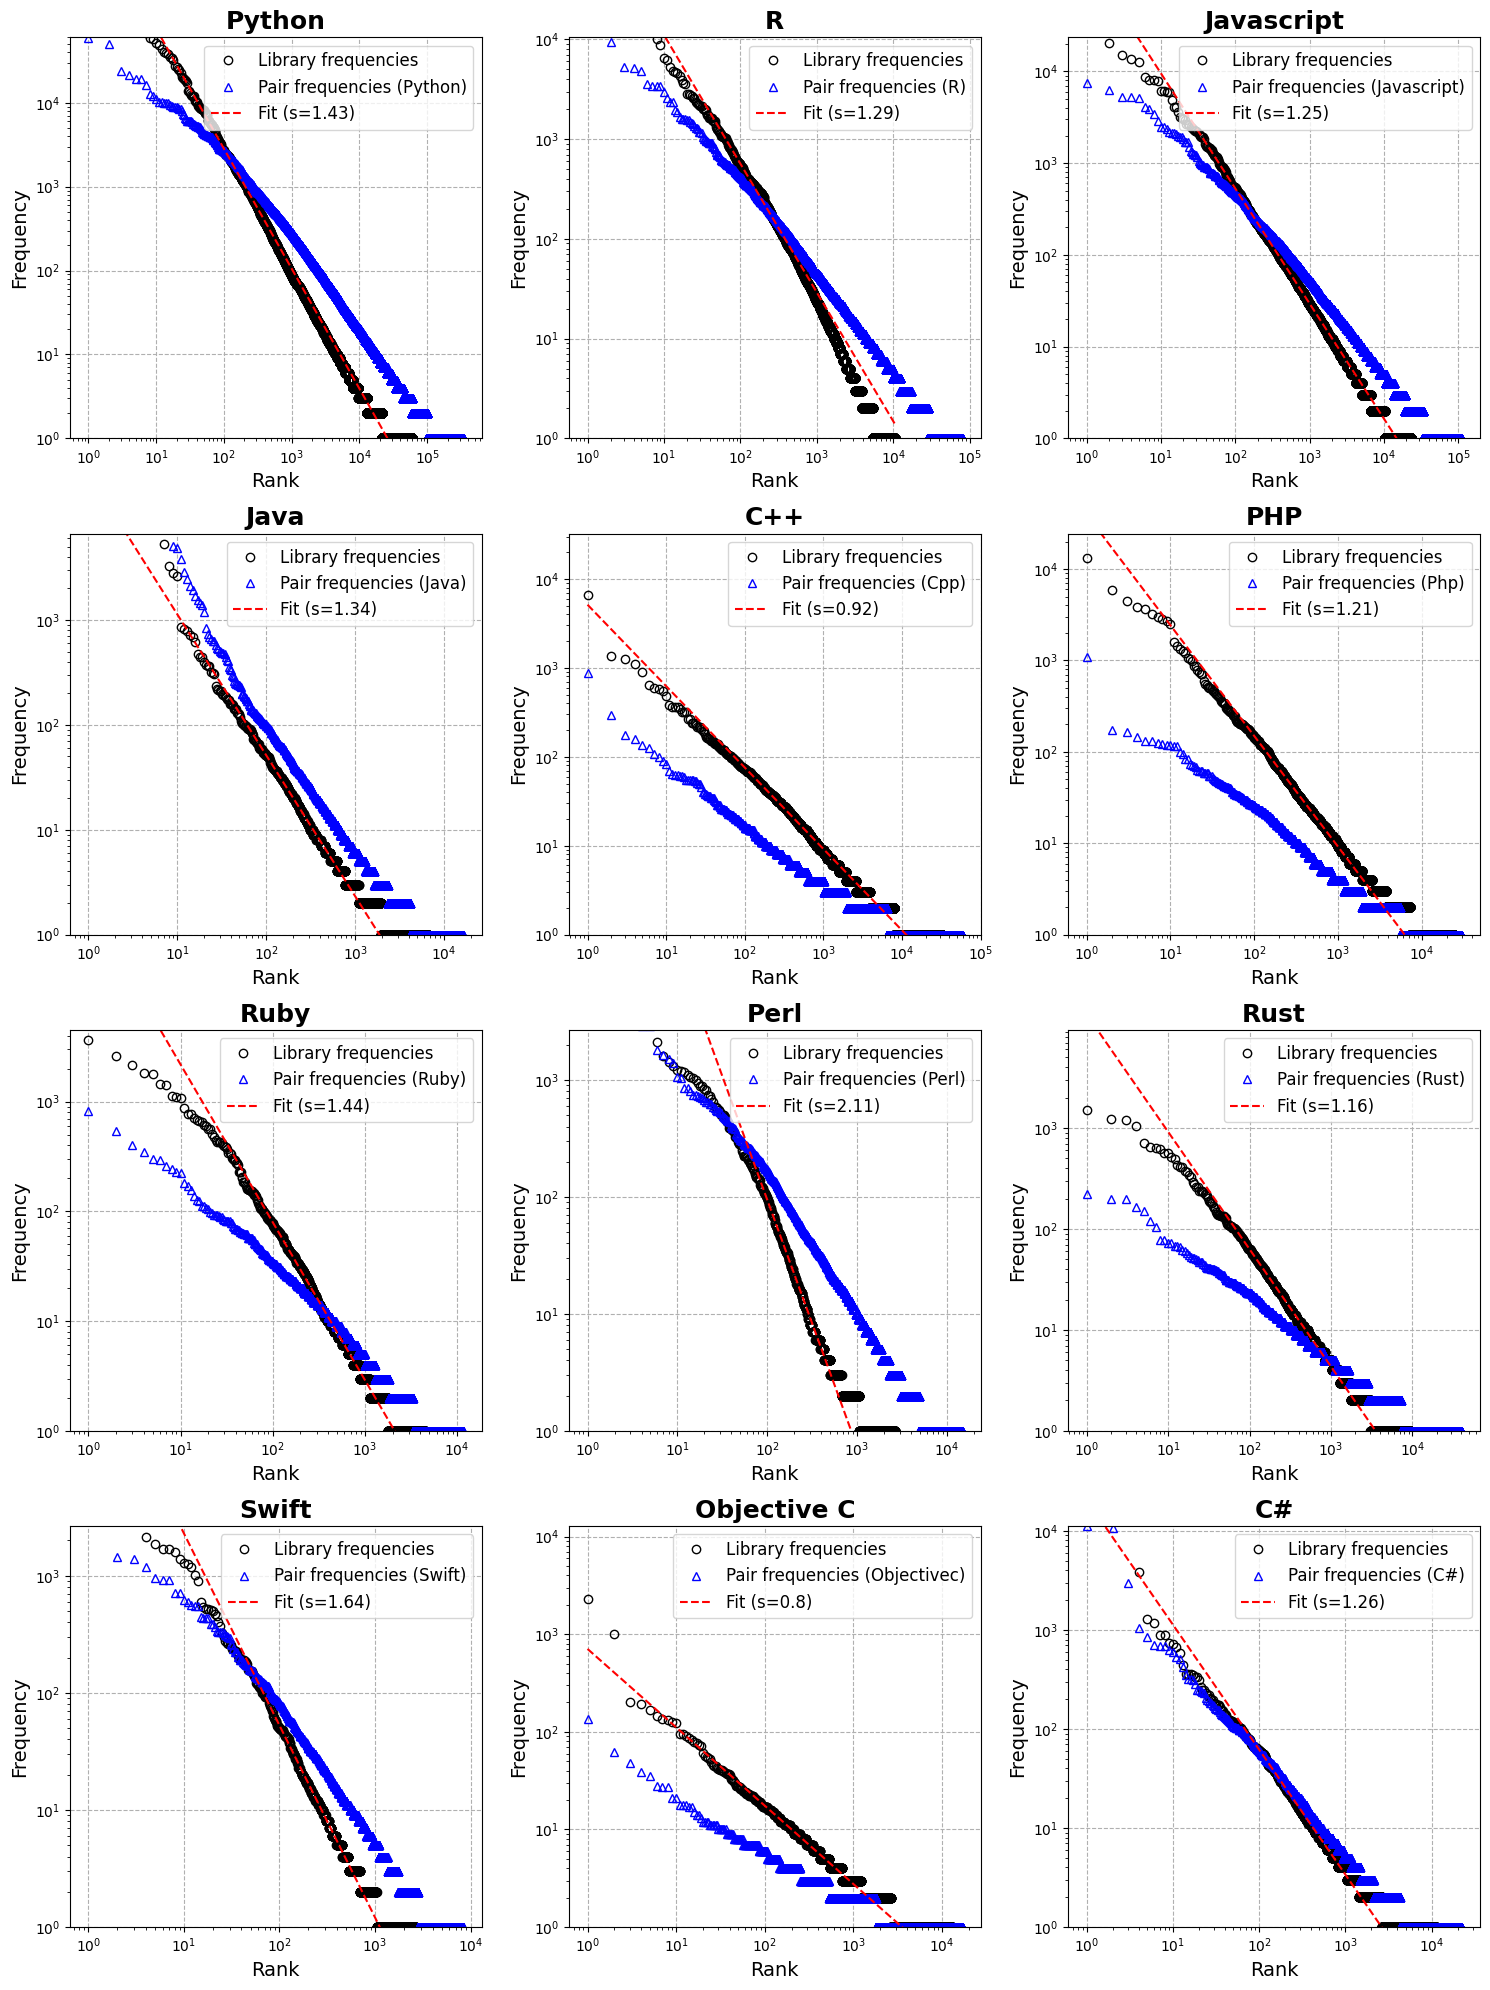

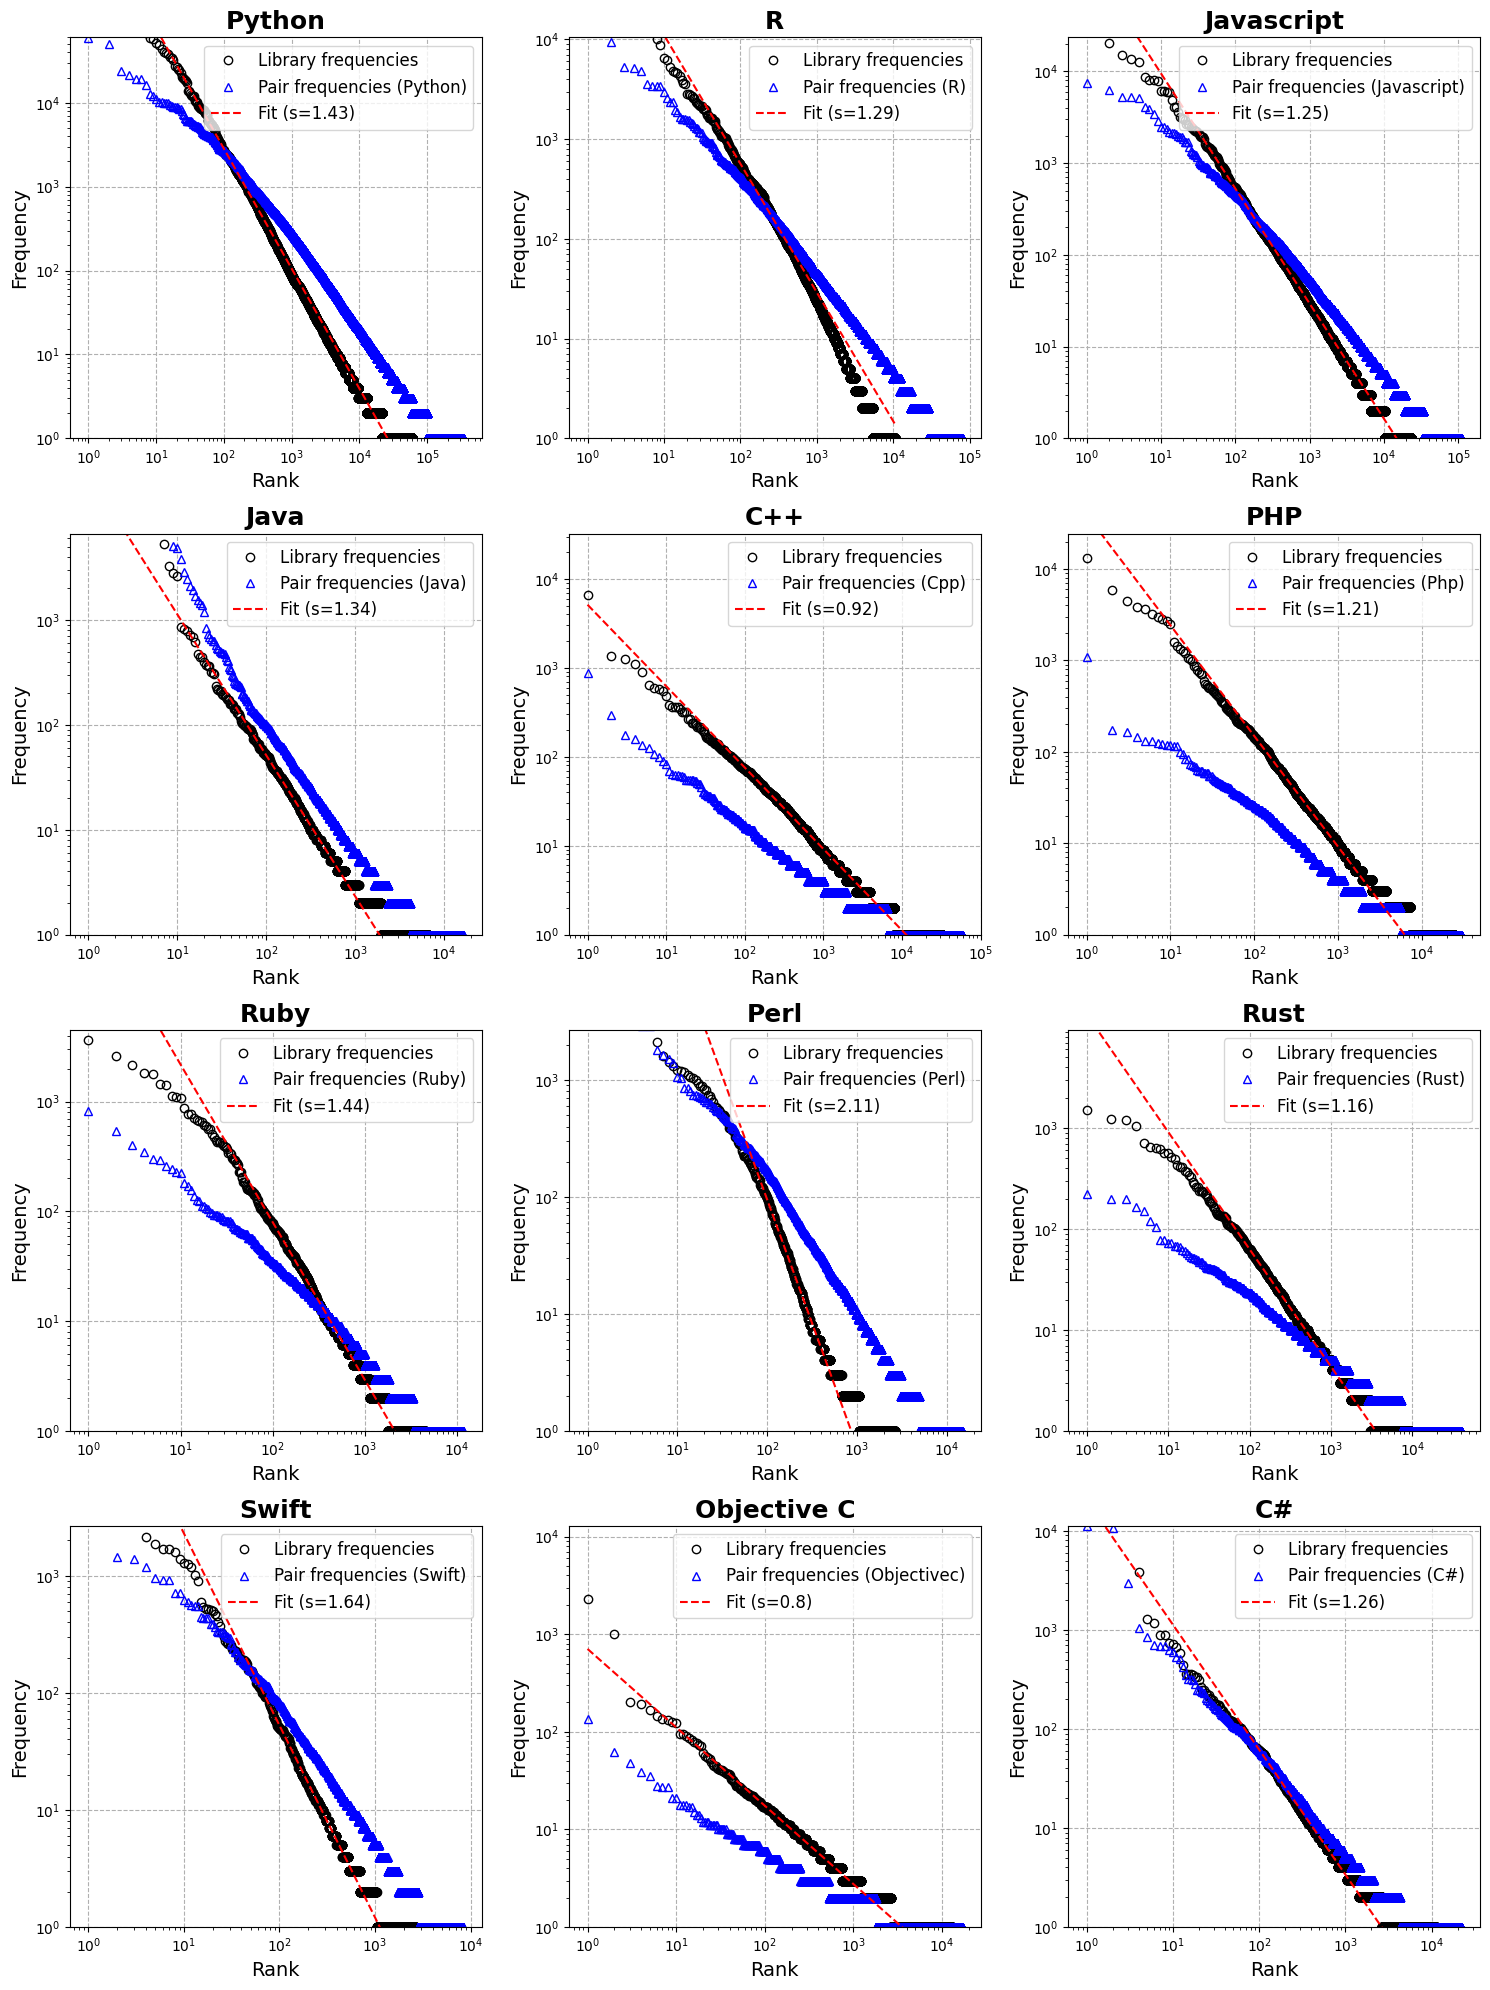

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

s_values = {}
r2_values = {}

def read_json(filepath):
    try:
        with open(filepath) as handle:
            return json.load(handle)
    except FileNotFoundError:
        print(f"File {filepath} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file {filepath}.")
        return {}

def plot_language_data(ax, language, path_to_lib, APPEARANCE_LOWER_LIMIT):
    print(f"Processing {language}")
    post_to_libs, _ = collect_post_count_to_new_libs_and_pairs(language, count_lower_limit=APPEARANCE_LOWER_LIMIT)
    all_libs_dates = read_json(f"{path_to_lib}/{language}_all_libs_dates.json")
    all_pairs_dates = read_json(f"{path_to_lib}/{language}_all_pairs_dates.json")

    if not all_libs_dates:
        return

    libs_freq = {k: len(v) for k, v in all_libs_dates.items()}
    sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

    pairs_freq = {k:len(v) for k, v in all_pairs_dates.items()}
    sorted_pairs_freq = sorted(pairs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_pairs_freq_values = [x[1] for x in sorted_pairs_freq]

    xs = range(1, len(sorted_libs_freq) + 1)
    ax.loglog(xs, sorted_libs_freq_values,  "o",
              color="black", markerfacecolor='none',
              label=f"Library frequencies")

    ax.loglog(range(1, len(sorted_pairs_freq) + 1), sorted_pairs_freq_values,  "^",
              color="blue", markerfacecolor='none',
              label=f"Pair frequencies ({language.capitalize()})")

    ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
    frequencies = np.array(sorted_libs_freq_values)

    def zipf(rank, s, k):
        return k / (rank ** s)

    region_start = 100
    region_end = 1000

    if len(ranks) < region_end:
        region_end = len(ranks)

    (s, k), cov = curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )

    fitted_frequencies = zipf(ranks, s, k)
    
    # Calculate the residual sum of squares (SS_res)
    ss_res = np.sum((frequencies[region_start:region_end] - fitted_frequencies[region_start:region_end]) ** 2)
    
    # Calculate the total sum of squares (SS_tot)
    ss_tot = np.sum((frequencies[region_start:region_end] - np.mean(frequencies[region_start:region_end])) ** 2)
    
    # Calculate the R^2 value
    r_squared = 1 - (ss_res / ss_tot)
    
    print(f"R^2: {r_squared:.4f}")
    s_values[language] = round(s, 2)
    r2_values[language] = r_squared
    
    ax.loglog(xs, fitted_frequencies, "r--", label=f"Fit (s={round(s, 2)})")
    ax.set_ylim(1, len(xs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which="major", ls="--")
    ax.legend(fontsize=12, loc="upper right")

    # Turn off scientific notation for the y-axis
    #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='y')
    
    # Turn off scientific notation for the x-axis
    #ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='x')

for LIMIT in [0, 10, 50, 100]:
    rows, columns = (len(LANGUAGES) + 2) // 3, 3
    fig = plt.figure(figsize=(15, 5 * rows))
    gs = GridSpec(rows, columns, figure=fig)
    plt.subplots_adjust(hspace=0.8, wspace=0.3) 
    
    for index, language in enumerate(LANGUAGES):
        i, j = index // columns, index % columns
        ax = fig.add_subplot(gs[i, j])
        plot_language_data(ax, language, f"data/results/{language}", 100)
    
    #fig.suptitle("Zip's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.savefig(f"zips_12_pairs_with_limit_{LIMIT}.png")
